In [86]:
import numpy as np

In [87]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as mpl
%matplotlib inline

In [88]:
# Let's create a function to model and create data
def func(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [89]:
help(np.exp)

Help on ufunc object:

exp = class ufunc(builtins.object)
 |  Functions that operate element by element on whole arrays.
 |  
 |  To see the documentation for a specific ufunc, use np.info().  For
 |  example, np.info(np.sin).  Because ufuncs are written in C
 |  (for speed) and linked into Python with NumPy's ufunc facility,
 |  Python's help() function finds this page whenever help() is called
 |  on a ufunc.
 |  
 |  A detailed explanation of ufuncs can be found in the "ufuncs.rst"
 |  file in the NumPy reference guide.
 |  
 |  Unary ufuncs:
 |  =============
 |  
 |  op(X, out=None)
 |  Apply op to X elementwise
 |  
 |  Parameters
 |  ----------
 |  X : array_like
 |      Input array.
 |  out : array_like
 |      An array to store the output. Must be the same shape as `X`.
 |  
 |  Returns
 |  -------
 |  r : array_like
 |      `r` will have the same shape as `X`; if out is provided, `r`
 |      will be equal to out.
 |  
 |  Binary ufuncs:
 |  ==============
 |  
 |  op(X, Y, ou

In [90]:
np.exp(np.array([1,4,9]))

array([  2.71828183e+00,   5.45981500e+01,   8.10308393e+03])

In [91]:
type((1,4,9))

tuple

In [92]:
# Generating clean data
x = np.linspace(0, 10, 100)
y = func(x, 1, 5, 2)

In [93]:
x.shape

(100,)

In [94]:
y.shape

(100,)

In [95]:
# Adding noise to the data
yn = y+0.2*np.random.normal(size=len(x))

In [96]:
np.random.normal(size=(5,5)).shape

(5, 5)

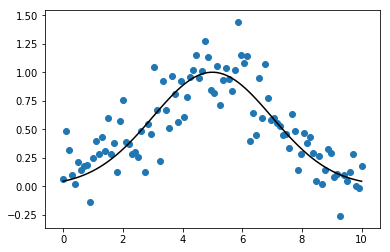

In [97]:
# Plot out the current state of the data and model
fig = mpl.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, c='k', label='Function')
ax.scatter(x, yn)
fig.savefig('model_and_noise.png')

In [98]:
help(fig.add_subplot)

Help on method add_subplot in module matplotlib.figure:

add_subplot(*args, **kwargs) method of matplotlib.figure.Figure instance
    Add a subplot.  Examples::
    
        fig.add_subplot(111)
    
        # equivalent but more general
        fig.add_subplot(1,1,1)
    
        # add subplot with red background
        fig.add_subplot(212, facecolor='r')
    
        # add a polar subplot
        fig.add_subplot(111, projection='polar')
    
        # add Subplot instance sub
        fig.add_subplot(sub)
    
    *kwargs* are legal :class:`~matplotlib.axes.Axes` kwargs plus
    *projection*, which chooses a projection type for the axes.
    (For backward compatibility, *polar=True* may also be
    provided, which is equivalent to *projection='polar'*). Valid
    values for *projection* are: ['aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear'].  Some of
    these projections
    support additional *kwargs*, which may be provided to
    :meth:`add_axes`.
    
    The :

In [99]:
# Executing curve_fit on noisy data
popt, pcov = curve_fit(func, x, yn)

In [103]:
#popt returns the best fit values for parameters of the given model (func)
print("optimal parameters=", popt)
print(pcov)

optimal parameters= [ 0.98494051  5.03312761  2.1238134 ]
[[  1.56015281e-03  -2.89509329e-06  -2.32602113e-03]
 [ -2.89509329e-06   9.63062719e-03   1.54509995e-05]
 [ -2.32602113e-03   1.54509995e-05   1.01265155e-02]]


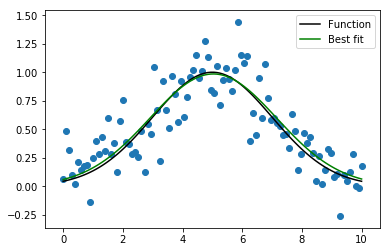

In [104]:
fig = mpl.figure()
ax = fig.add_subplot(111)
ymodel = func(x, popt[0], popt[1], popt[2])
ax.plot(x, y, c='k', label='Function')
ax.scatter(x, yn)
ax.plot(x, ymodel, c='g', label='Best fit')
ax.legend()
fig.savefig('model_fit.png')